# 2023-07-26__AdEx_Nto1_we_I_syn

In [2]:
%run lib/Nto1.py

importing numpy, brian … ✔


In [4]:
n, P, Se, Si, M, S, SP, net = Nto1(N=6500, vars_to_record=["V", "I", "ge", "gi", "w"])
net.store()

In [5]:
net.restore()
set_seed(1234)
we = 14 * pS
wi = we * 4
T = 1 * second
net.run(T, report='text')

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s


In [64]:
%run lib/plot.py

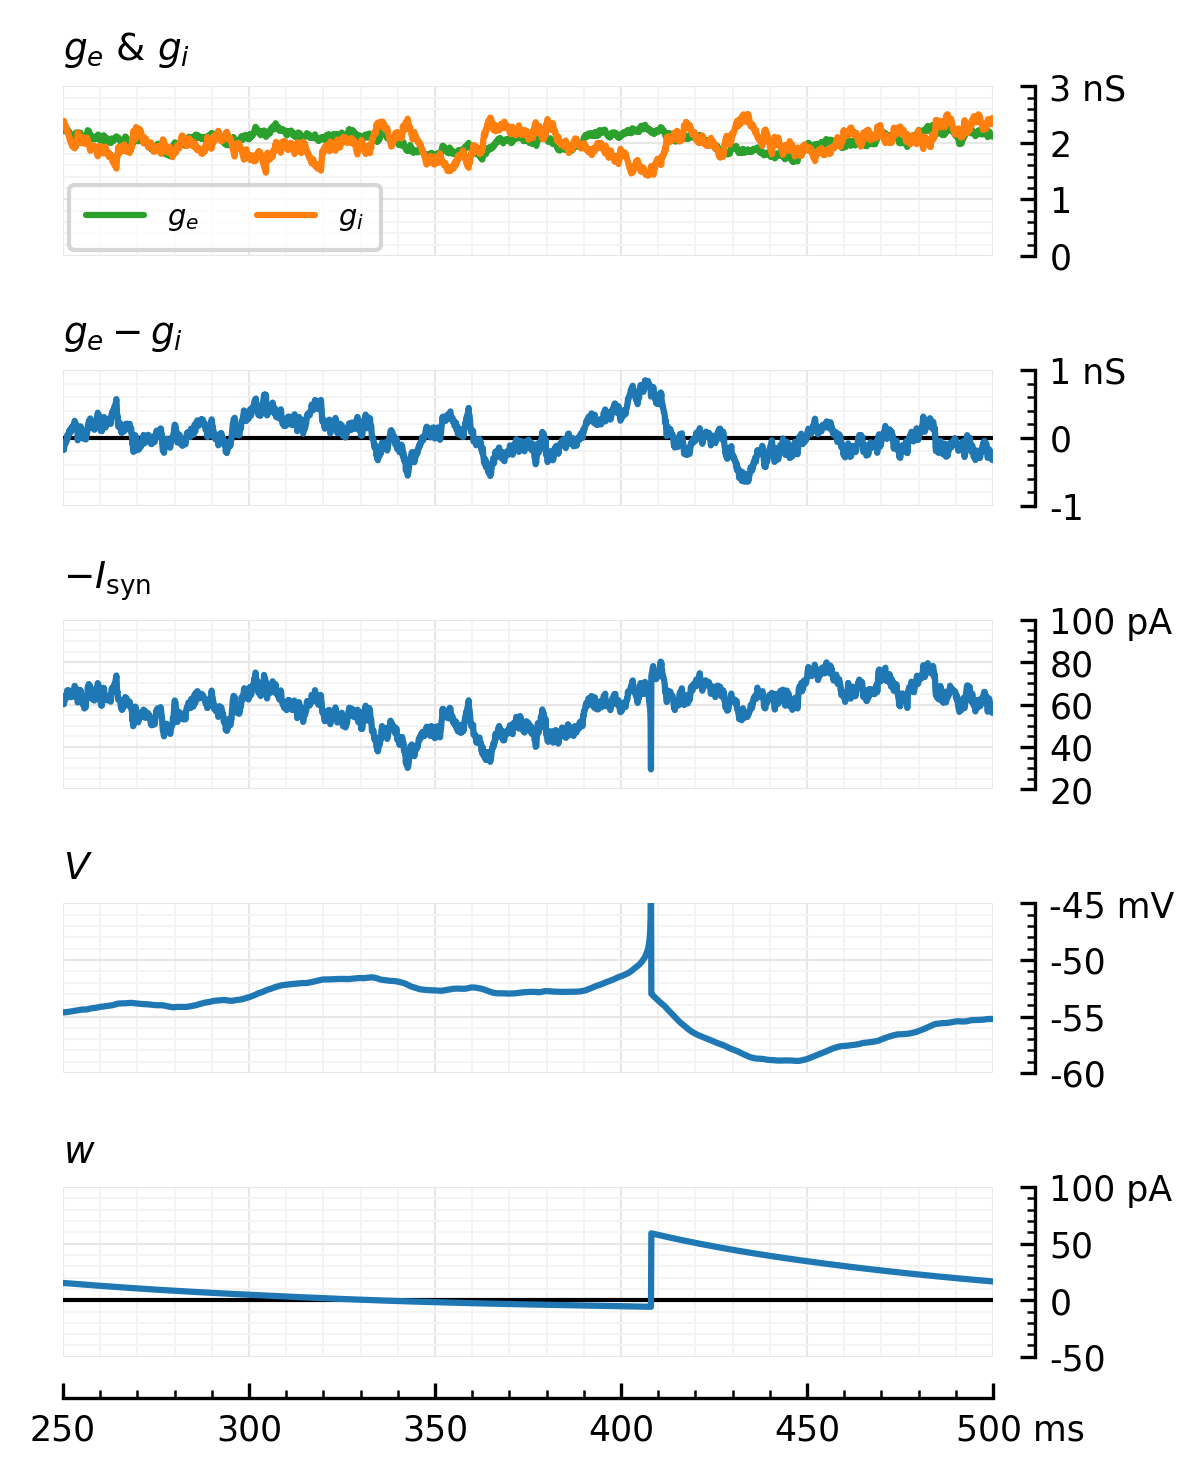

In [60]:
kw = dict(tlim = [250, 500]*ms, t_unit=ms, nbins_y=3, yaxloc="right")
fig, axs = plt.subplots(figsize=(4, 5.5), nrows=5, sharex=True, height_ratios=[1,0.8,1,1,1])
add_hline(axs[1])
add_hline(axs[-1])
plotsig(M.ge[0], "$g_e$ & $g_i$", **kw, ylim=[0, 2.8], ax=axs[0], color="C2", label="$g_e$")
plotsig(M.gi[0], None, **kw, ylim=[0, 2.8], ax=axs[0], color="C1", label="$g_i$")
axs[0].legend(loc="lower left", ncols=2, fontsize="x-small")
plotsig(M.ge[0] - M.gi[0], "$g_e - g_i$", **kw, ax=axs[1], y_unit=nS)
plotsig(-M.I[0], "$-I_\mathrm{syn}$", ylim=[25, 85], **kw, ax=axs[2])
plotsig(M.V[0], "$V$", **kw, ylim=[-60, -45], ax=axs[3])
plotsig(M.w[0], "$w$", **kw, ylim=[-20, 60], ax=axs[4])
axs[0].set_xlim(kw["tlim"] / ms)
axs[-1].set_xlabel(None)
for ax in axs[0:-1]:
    ax.set_xlabel(None)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(bottom=False, which='both')
plt.subplots_adjust(hspace=0.7)

In [65]:
savefig_thesis("all_sigs", fig);